In [ ]:
import random
import graphviz as gv
import csv
import heapq as hq
import numpy as np
import math

In [13]:
!pip install perlin_noise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
Calles1=[]
with open("LibroPrueba.csv") as archivo:
  reader=csv.reader(archivo)
  for row in reader:
    Calles1.append(row)

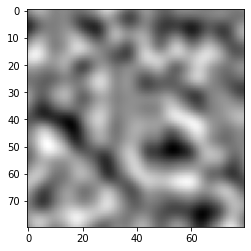

In [42]:
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

noise= PerlinNoise(octaves=len(Calles1), seed=1)
xpiv,ypix=80,80
pic=[[noise([i/xpiv,j/ypix])for j in range(xpiv)]for i in range(ypix)]

plt.imshow(pic,cmap="gray")
plt.show()

In [32]:
print(np.array(np.array(pic)+100, dtype=int)[:20, :10])

[[100  99  99 100  99 100 100 100 100 100]
 [ 99 100  99 100  99 100  99  99 100  99]
 [100  99 100  99 100  99  99 100 100  99]
 [100 100  99 100  99 100  99 100 100  99]
 [100  99  99  99  99 100  99  99 100 100]
 [ 99  99  99 100  99 100  99  99  99 100]
 [ 99  99  99  99  99  99 100 100 100 100]
 [ 99 100 100  99 100 100 100 100  99 100]
 [100 100 100 100  99  99 100 100 100 100]
 [100  99 100 100 100  99  99  99  99 100]
 [100  99 100 100 100  99  99 100 100 100]
 [ 99 100 100 100  99  99  99  99 100  99]
 [ 99  99 100  99 100  99 100  99 100 100]
 [ 99  99  99 100 100 100 100  99 100  99]
 [ 99 100 100 100  99  99  99  99 100  99]
 [100 100  99  99 100  99 100 100  99 100]
 [100  99  99  99  99  99 100 100 100  99]
 [ 99 100  99  99  99 100  99  99 100 100]
 [ 99 100  99  99 100 100  99  99 100  99]
 [100  99 100 100 100  99  99 100  99 100]]


In [53]:
from datetime import datetime

import pytz

tz_IN = pytz.timezone('America/Lima') 

datetime_IN = datetime.now(tz_IN)

print("Current time in Lima is :", datetime_IN.strftime("%H:%M:%S"))


Current time in Lima is : 22:53:16


In [37]:
time_elsewhere = datetime.now(pytz.timezone('Asia/Kolkata'))
print(time_elsewhere.strftime("%H:%M:%S"))

08:53:51


In [54]:
time_as_now = datetime.now(pytz.timezone('America/Lima'))
peso_calle = 0
if time_as_now > time_elsewhere:
    peso_calle = 5
else:
    peso_calle =8

print(peso_calle)
n=len(Calles1)
Longitud =[]
Pesos=[]
for i in range(n):
  Longitud.append(random.randint(100,1200))

for i in range(len(Calles1)):
  if time_as_now == "07:00:00" and time_as_now == "08:30:00" or time_as_now=="18:30:00" and time_as_now=="20:00:00":
    Trafico=1
    Pesos.append(Trafico * Longitud[i]) /100
  print(Pesos)

5
[]
[]
[]
[]
[]
[]
[]


In [52]:
Calles1

[['Aux.TupacAmaru', 'Central'],
 ['Aux.TupacAmaru', 'LosCrisantemos'],
 ['Aux.TupacAmaru', 'CaminoReal'],
 ['Aux.TupacAmaru', 'ElDorado'],
 ['Aux.TupacAmaru', 'Florales'],
 ['Aux.TupacAmaru', 'Miraflores'],
 ['Aux.TupacAmaru', 'Lazmines']]

In [ ]:
labels=[]
def show(Grafo, labels=None, dirigido=False, peso=False, path=[], layout="sfdp"):
  grafo = gv.Digraph("alegria") if dirigido else gv.Graph("felicidad")
  grafo.graph_attr["layout"] = layout
  grafo.edge_attr["color"] = "gray"
  grafo.edge_attr["fontsize"] = "8"
  grafo.node_attr["color"] = "orangered"
  grafo.node_attr["width"] = "0.1"
  grafo.node_attr["height"] = "0.1"
  grafo.node_attr["fontsize"] = "8"
  grafo.node_attr["fontcolor"] = "mediumslateblue"
  n = len(Grafo)
  for fila in range(n):
    grafo.node(str(fila), labels[fila] if labels else str(fila))

  added = set()
  for columna, fila in enumerate(path):
    if fila >= 0:
      if peso:
        for vi, espacio in Grafo[fila]:
          if vi == columna:
            break

        grafo.edge(str(fila), str(columna), str(espacio), dir="forward", penwidt="2", color="orange")
      else:
        grafo.edge(str(fila), str(columna), dir="forward", penwidt="2", color="orange")

      added.add(f"{fila}->{columna}")
      added.add(f"{columna}->{fila}")
    #peso
  if peso:
    for fila in range(n):
      for columna, espacio in Grafo[fila]:
        if not dirigido and not f"{fila}->{columna}" in added:
          added.add(f"{fila}->{columna}")
          added.add(f"{columna}->{fila}")
          grafo.edge(str(fila), str(columna), str(espacio))
        elif dirigido:
          grafo.edge(str(fila), str(columna), str(espacio))
  else:
    for fila in range(n):
      for columna in Grafo[fila]:
        if not dirigido and not f"{fila}->{columna}" in added:
          added.add(f"{fila}->{columna}")
          added.add(f"{columna}->{fila}")
          grafo.edge(str(fila), str(columna))
        elif dirigido:
          grafo.edge(str(fila), str(columna))
  return grafo

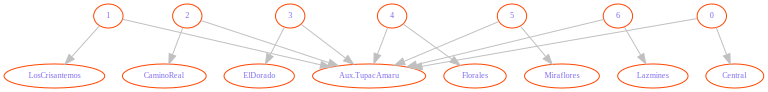

In [ ]:
show(Calles1, dirigido=True, labels=labels, layout="dot")


In [ ]:
show(Calles1, dirigido=True, peso=True, labels=labels, layout="dot")

ValueError: ignored